<a href="https://colab.research.google.com/github/Ayesha765/pwAssign/blob/main/EvaluationMetricsandRegressionImplementation_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# PRACTICAL QUESTIONS

---

Q1.  Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

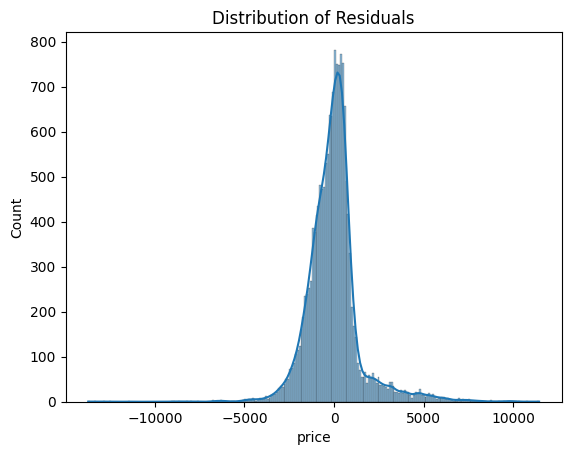

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load dataset
data = sns.load_dataset('diamonds').dropna()
X = data[['carat', 'depth', 'table']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

Q2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and
Root Mean Squared Error (RMSE) for a linear regression model.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

MSE: 2289438.0914799524, MAE: 990.2394810117845, RMSE: 1513.0889238507934


Q3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

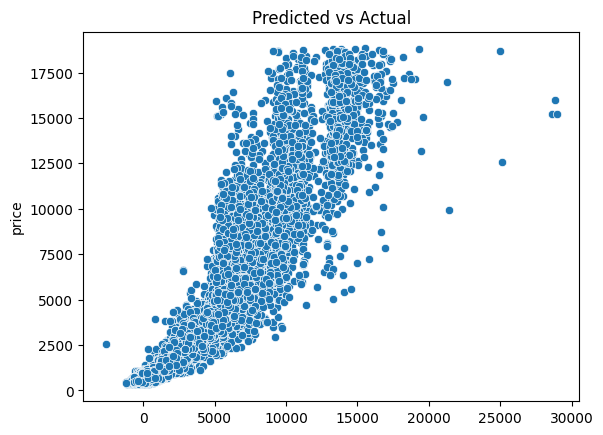

In [ ]:
import statsmodels.api as sm

# Linearity
sns.scatterplot(x=y_pred, y=y_test)
plt.title('Predicted vs Actual')
plt.show()

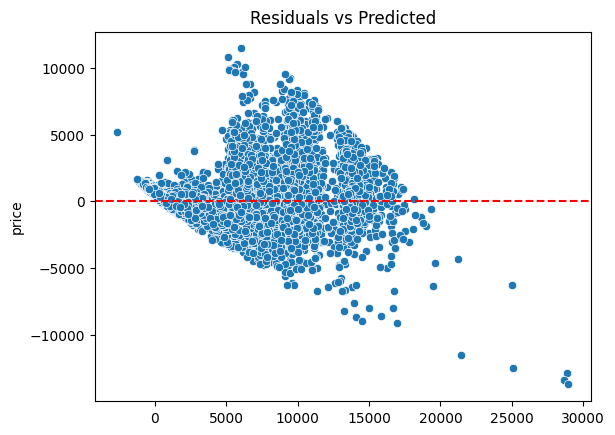

In [ ]:
import statsmodels.api as sm

# Residuals plot for homoscedasticity
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.show()

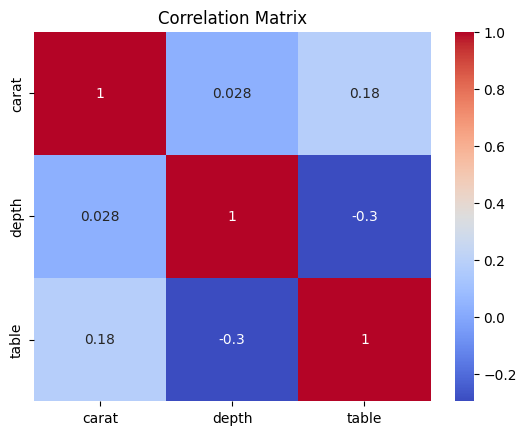

In [ ]:
import statsmodels.api as sm

# Correlation matrix
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Q4.  Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])
pipeline.fit(X_train, y_train)
print(f"Pipeline Score: {pipeline.score(X_test, y_test)}")

Pipeline Score: 0.8685344592710659


Q5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept,
and R-squared scoreK.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients, intercept, and R-squared
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X_test, y_test))

Coefficients: [7868.16437509 -148.71363682 -105.92566843]
Intercept: 12927.74936694913
R-squared: 0.8532031629541938


Q6.  Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

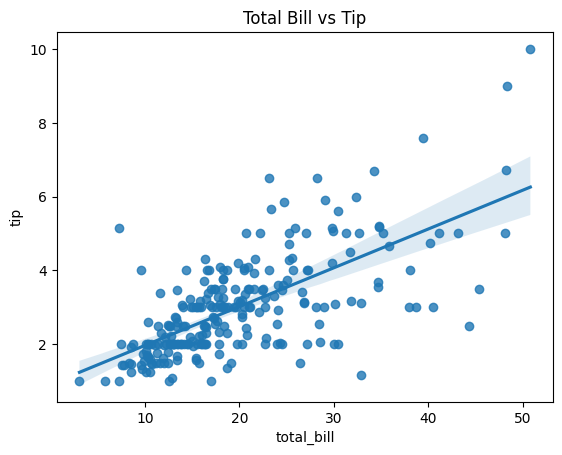

In [ ]:
tips = sns.load_dataset('tips')
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('Total Bill vs Tip')
plt.show()

Q7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

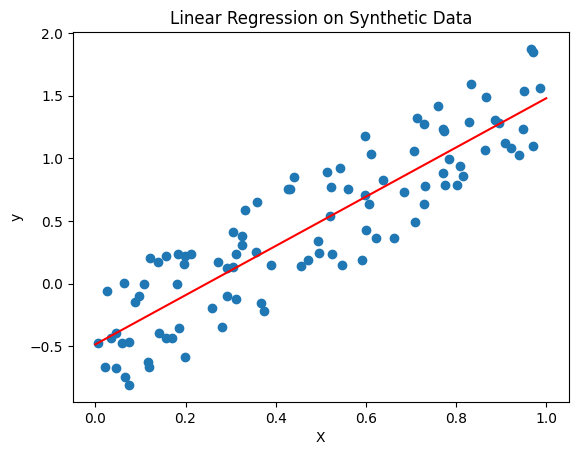

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + np.random.rand(100, 1) - 1

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict new values
X_new = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot the data and regression line
plt.scatter(X, y)
plt.plot(X_new, y_pred, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression on Synthetic Data")
plt.show()

Q8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [ ]:
import pickle

# Save the model to a file
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

Q9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression()

Q10. Generate synthetic data for simple linear regression (use random values for X and y)and fit a linear regression model to the data. Print the model's coefficient and intercept.

In [ ]:
X_syn = np.random.rand(100, 1) * 10
y_syn = 3 * X_syn + 5 + np.random.randn(100, 1)
model.fit(X_syn, y_syn)
print(f"Coefficient: {model.coef_}, Intercept: {model.intercept_}")

Coefficient: [[3.02829806]], Intercept: [4.92335662]


Q11. Write a Python script that fits polynomial regression models of different degrees toa synthetic dataset and compares their performance.

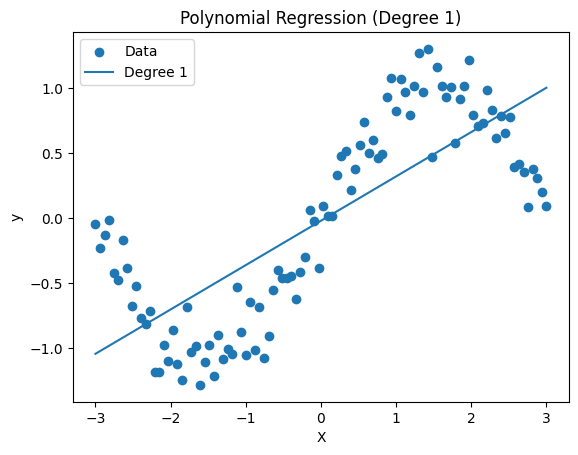

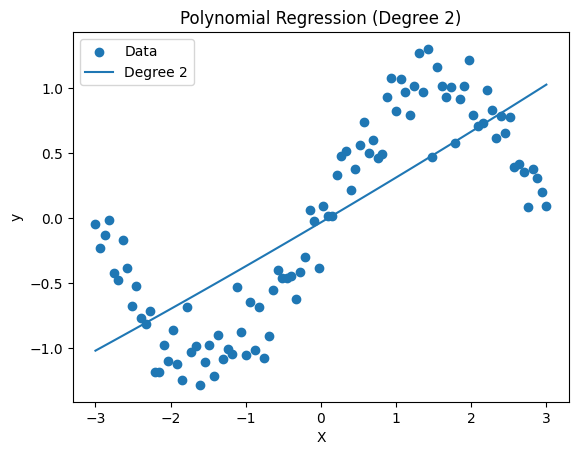

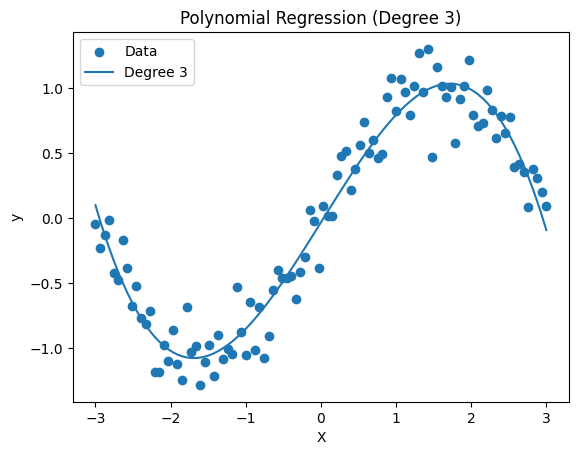

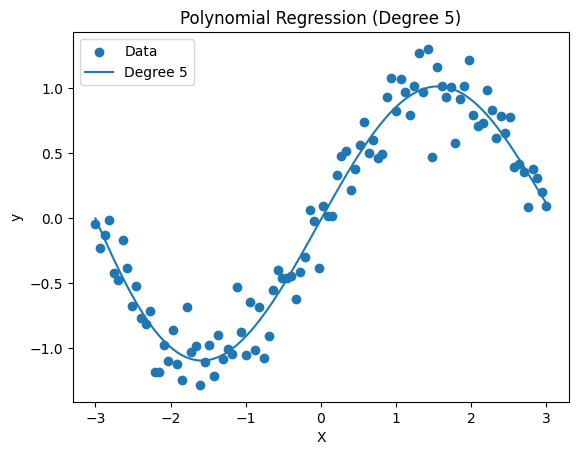

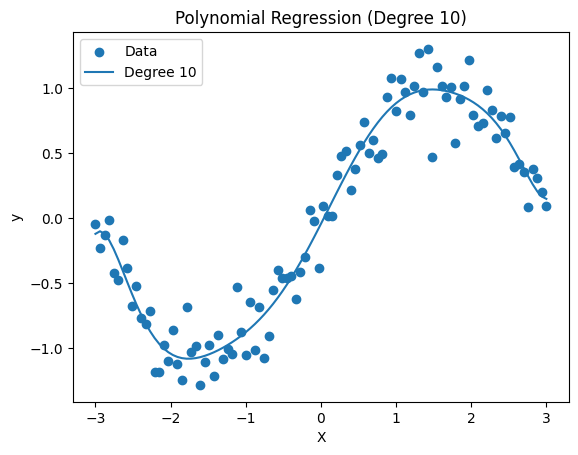

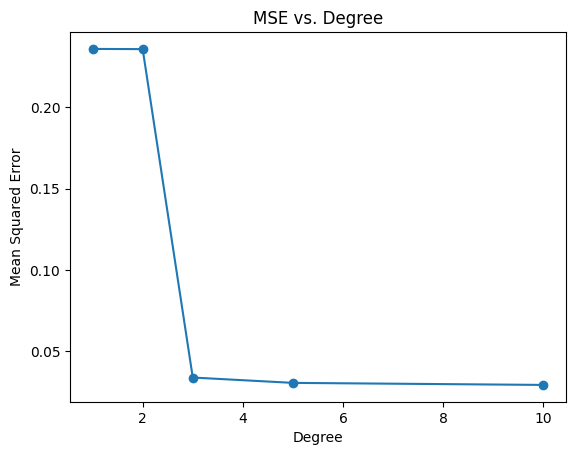

Best degree: 10


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.2, X.shape)

# Define degrees to test
degrees = [1, 2, 3, 5, 10]

# Create a list to store MSE values
mse_values = []

# Loop through different degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on the data
    y_pred = model.predict(X_poly)

    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot the results
    plt.figure()
    plt.scatter(X, y, label="Data")
    plt.plot(X, y_pred, label=f"Degree {degree}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.legend()
    plt.show()

# Plot MSE vs. Degree
plt.figure()
plt.plot(degrees, mse_values, marker='o')
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Degree")
plt.show()

# Find the degree with the lowest MSE
best_degree = degrees[np.argmin(mse_values)]
print(f"Best degree: {best_degree}")

Q12.  Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data with two features
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients, intercept, and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", r2_score(y, model.predict(X)))

Coefficients: [2.33866677 3.35494603]
Intercept: -0.22772773589829498
R-squared: 0.5811821957321339


Q13.  Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

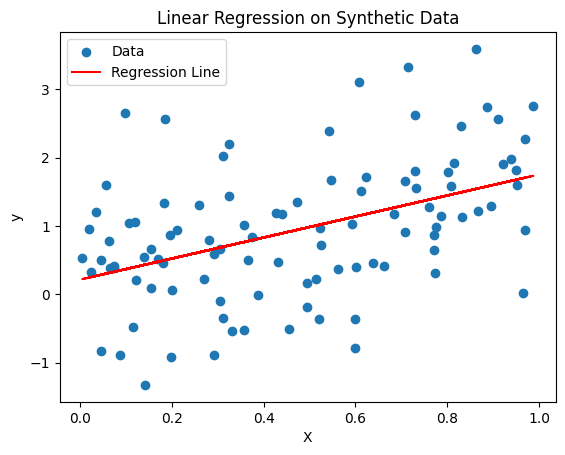

In [ ]:
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X.ravel() + np.random.randn(100)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict on the data
y_pred = model.predict(X)

# Visualize the results
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression on Synthetic Data")
plt.show()

Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a
dataset with multiple features.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Sample data with multiple features
data = {'X1': [1, 2, 3, 4, 5], 'X2': [2, 4, 6, 8, 10], 'X3': [1, 3, 5, 7, 9], 'y': [5, 10, 15, 20, 25]}
df = pd.DataFrame(data)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns

print(vif)


   VIF Factor features
0         inf       X1
1         inf       X2
2       181.5       X3
3         inf        y


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Q15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

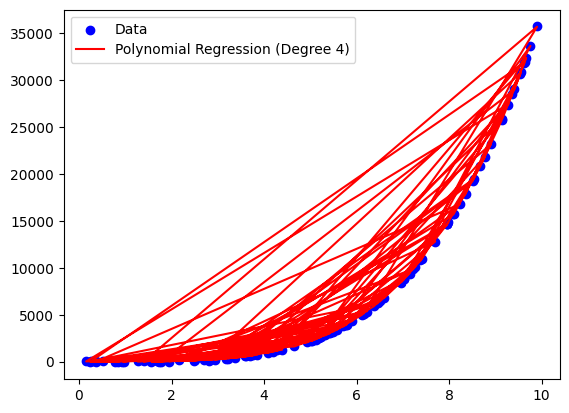

In [ ]:
X = np.random.rand(100, 1) * 10
y = 4 * X**4 - 3 * X**3 + 2 * X**2 - X + np.random.randn(100, 1) * 50

# Fit polynomial regression
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression (Degree 4)')
plt.legend()
plt.show()

Q16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit pipeline
pipeline.fit(X_train, y_train)
print(f"R² Score: {pipeline.score(X_test, y_test)}")

R² Score: 0.8532031629541935


Q17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

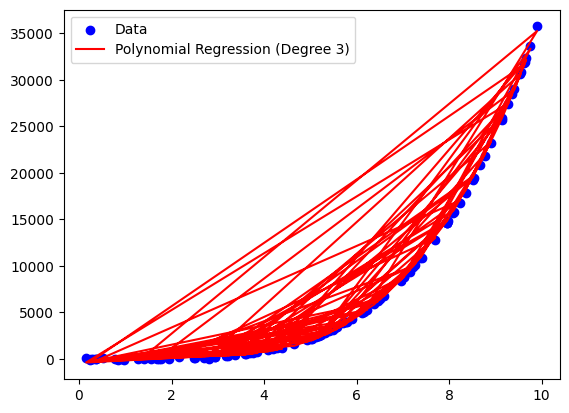

In [ ]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression (Degree 3)')
plt.legend()
plt.show()

Q18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [ ]:
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] - 1 * X[:, 2] + 5 * X[:, 3] + 0.5 * X[:, 4] + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R² Score: {model.score(X, y)}")

Coefficients: [ 1.92472594  2.86042866 -0.73460577  5.0704968   0.19082452]
Intercept: 0.1680839318098819
R² Score: 0.7817907726178199


Q19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

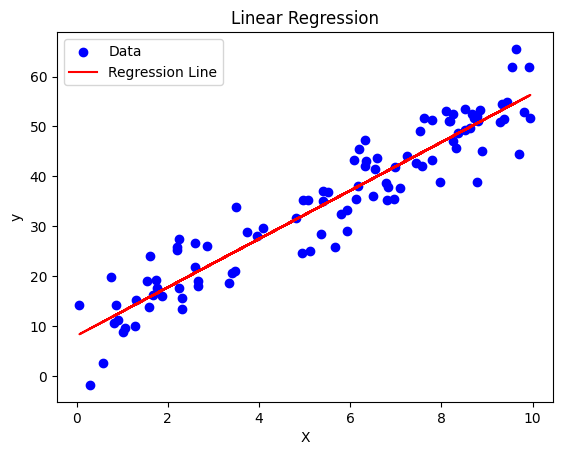

In [ ]:
X = np.random.rand(100, 1) * 10
y = 5 * X + 7 + np.random.randn(100, 1) * 5  # Linear relationship with noise

# Fit linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Visualize
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Q20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [ ]:
X = np.random.rand(100, 3)
y = 4 * X[:, 0] - 2 * X[:, 1] + 3 * X[:, 2] + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R² Score: {model.score(X, y)}")

Coefficients: [ 3.93499172 -1.8222326   3.0014379 ]
Intercept: -0.10766059700188757
R² Score: 0.739636777107767


Q21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [ ]:
import joblib

# Serialize
joblib.dump(model, 'model.joblib')

# Deserialize
loaded_model = joblib.load('model.joblib')
print(f"Loaded Model Coefficients: {loaded_model.coef_}")

Loaded Model Coefficients: [ 3.93499172 -1.8222326   3.0014379 ]


Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [ ]:
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


tips = sns.load_dataset('tips')

# Features and target
X = tips[['total_bill', 'sex', 'smoker']]
y = tips['tip']

# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['sex', 'smoker'])
    ],
    remainder='passthrough'
)

X_transformed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
print("Model R^2 Score:", model.score(X_test, y_test))

Model R^2 Score: 0.49399877536014325


Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge

X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_r2 = r2_score(y, linear_model.predict(X))
print("Linear Regression Coefficients:", linear_model.coef_)
print("Linear Regression R^2 Score:", linear_r2)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
ridge_r2 = r2_score(y, ridge_model.predict(X))
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Ridge Regression R^2 Score:", ridge_r2)

Linear Regression Coefficients: [86.00258028 74.11675411]
Linear Regression R^2 Score: 0.9897849636638466
Ridge Regression Coefficients: [84.86043241 73.40523972]
Ridge Regression R^2 Score: 0.9896524931003645


Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [ ]:
from sklearn.model_selection import cross_val_score
# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Linear Regression
model = LinearRegression()

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R^2 Scores:", scores)
print("Mean R^2 Score:", np.mean(scores))

Cross-Validation R^2 Scores: [0.99463423 0.98412153 0.98584032 0.99094125 0.98787217]
Mean R^2 Score: 0.9886819004122156


Q25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [ ]:
X = np.random.rand(100, 1) * 10
y = 2 * X**2 + 3 * X + np.random.randn(100, 1) * 10

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare models with different degrees
for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred = model.predict(X_poly_test)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {degree} R^2 Score: {r2}")

Degree 1 R^2 Score: 0.9224739761342913
Degree 2 R^2 Score: 0.9844229461945696
Degree 3 R^2 Score: 0.9846385290744211
